# Exploring the standard log-Gamma distribution

In [14]:
import numpy as np
from scipy.stats import gamma as Gamma
from matplotlib import pyplot as plt
%matplotlib inline

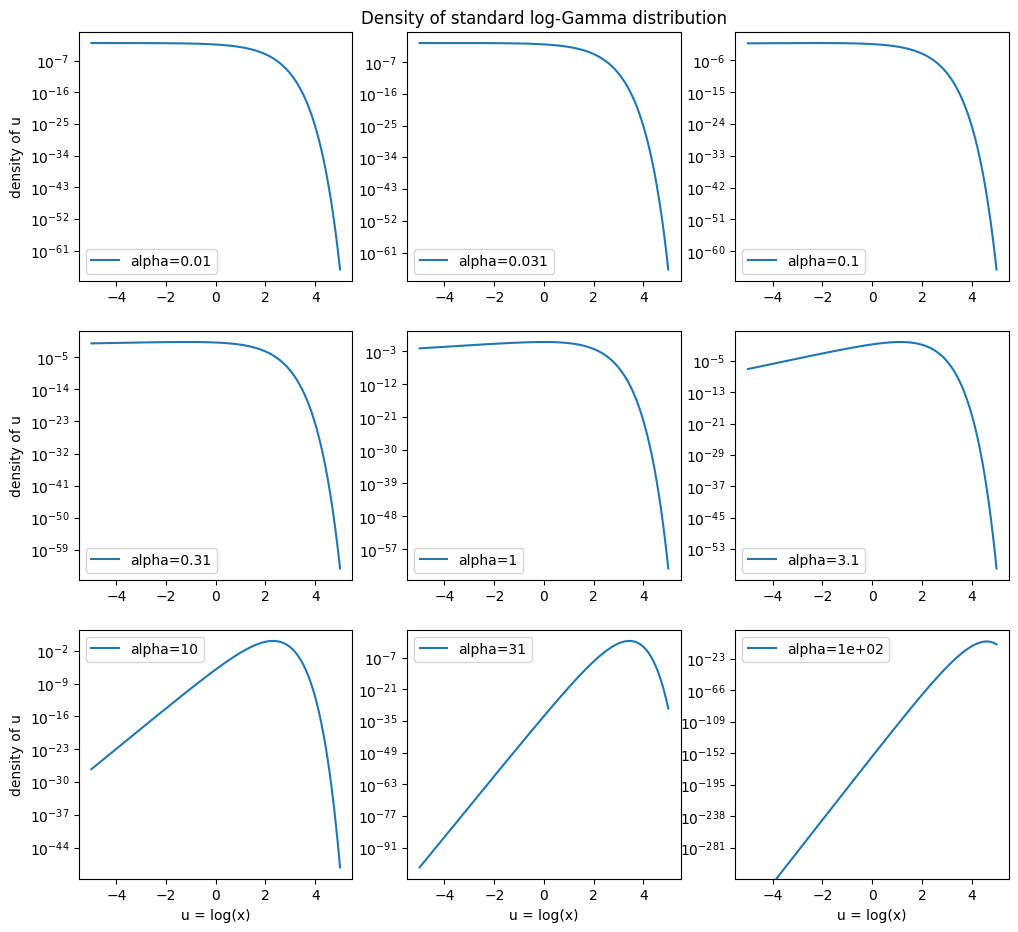

In [15]:
u = np.arange(-5, 5, 0.001)
x = np.exp(u)
du_dx = 1 / x
fig, axes = plt.subplots(3, 3, figsize=(12,11))
fig.patch.set_facecolor('white')
alpha_grid = np.array([1e-2, 3.1e-2, 1e-1, 3.1e-1, 1e0, 3.1e0, 1e1, 3.1e1, 1e2])
for i, (ax, alpha) in enumerate(zip(axes.reshape(-1), alpha_grid)):
    pdf = Gamma(alpha).pdf(x) / du_dx
    ax.plot(u, pdf, label='alpha={:0.2g}'.format(alpha))
    ax.set_yscale('log')
    ax.legend()
    if i // 3 == 2:
        ax.set_xlabel('u = log(x)')
    if i % 3 == 0:
        ax.set_ylabel('density of u')
    if i == 1:
        ax.set_title('Density of standard log-Gamma distribution')
plt.show()

In [16]:
import torch
import pyro
import pyro.distributions as dist
from pyro.distributions import constraints
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

In [17]:
def model():
    d = dist.TransformedDistribution(
        dist.Gamma(1, 1),
        dist.transforms.ExpTransform().inv,
    )
    pyro.sample("x", d)
    return d
    
def guide():
    loc = pyro.param("loc", lambda: torch.zeros(()))
    scale = pyro.param("scale", lambda: torch.ones(()),
                       constraint=constraints.positive)
    d = dist.Normal(loc, scale)
    pyro.sample("x", d)
    return d
    
pyro.clear_param_store()
elbo = Trace_ELBO(num_particles=100, vectorize_particles=True)
svi = SVI(model, guide, Adam({"lr": 0.02}), elbo)
for step in range(1001):
    loss = svi.step()
    if step % 50 == 0:
        print(f"step {step} loss = {loss}")

step 0 loss = 0.144876708984375
step 50 loss = 0.07799591064453125
step 100 loss = 0.13441619873046876
step 150 loss = 0.07932571411132812
step 200 loss = 0.04972000122070312
step 250 loss = 0.09156112670898438
step 300 loss = 0.21159576416015624
step 350 loss = 0.054425201416015624
step 400 loss = 0.04239349365234375
step 450 loss = 0.0339801025390625
step 500 loss = 0.023563079833984375
step 550 loss = 0.07141799926757812
step 600 loss = 0.09289871215820313
step 650 loss = 0.04230484008789062
step 700 loss = 0.0193267822265625
step 750 loss = 0.1243365478515625
step 800 loss = 0.07239334106445312
step 850 loss = 0.06415603637695312
step 900 loss = 0.06401580810546875
step 950 loss = 0.06870941162109374
step 1000 loss = 0.073411865234375


(-20.0, 0.0)

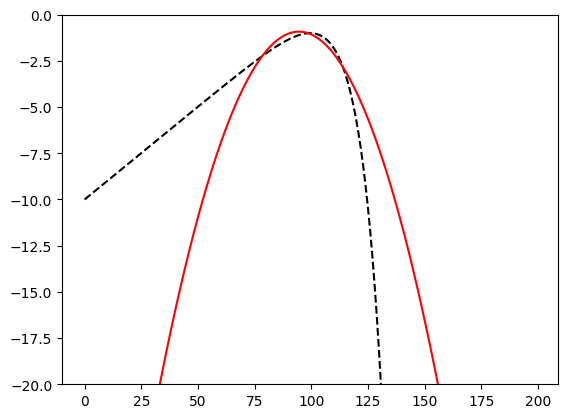

In [22]:
m = model()
g = guide()
x = torch.linspace(-10, 10, 200)
plt.plot(m.log_prob(x).data, "k--")
plt.plot(g.log_prob(x).data, "r-")
plt.ylim(-20, 0)